In [1709]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
import visu
import utils

import oscdetector as od

from PIL import Image
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

# Single TE: test

## visualization

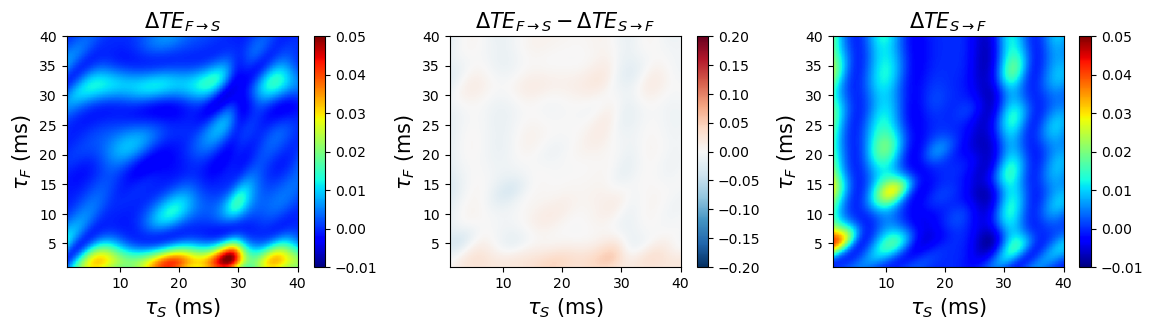

In [400]:
# te_data_2d = utils.load_pickle("./data/te_2d_mua_2/te_405.pkl")
te_data_2d = utils.load_pickle("./data/te_2d_mfast/te_102.pkl")
fig = visu.show_te_summary_2d(te_data_2d, vmax=0.05, vmin=-.01, vdmax=0.2)

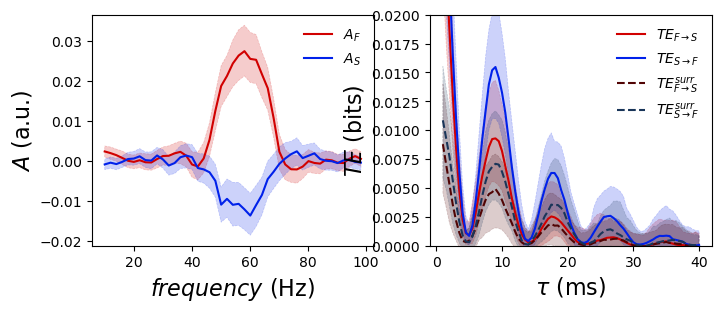

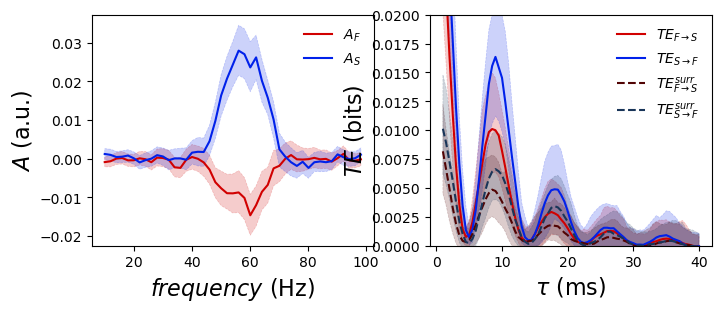

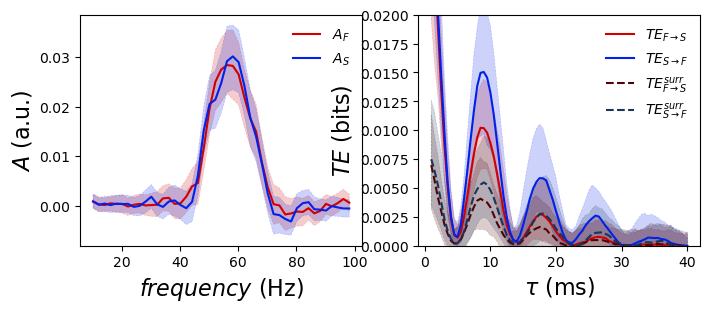

In [1992]:
cid = 4
yl = (0, 0.02)

wid_set = [2, 8, 10]
for wid in wid_set:
    fig, axs = plt.subplots(1,2,figsize=(8, 3))
    
    spec = utils.load_pickle("./data/spec_mfast/spec_%d%02d.pkl"%(cid, wid))
    te_data_2d = utils.load_pickle("./data/te_2d_mfast/te_%d%02d.pkl"%(cid, wid))
    te_data = utils.reduce_te_2d(te_data_2d)
    
    plt.sca(axs[0])
    visu.show_spec_summary(spec, figsize=None)
    
    plt.sca(axs[1])
    visu.show_te_summary(te_data, figsize=None, ax=axs[1], yl=yl)
    plt.show()


In [1995]:
reload(utils)

<module 'utils' from '/home/jungyoung/Project/hh_neuralnet/information_routing/utils.py'>

In [1997]:
winfo, _ = utils.load_osc_motif(1, 2, reverse=False, verbose=True)

Loaded oscillation motif information udpated in 20240714
1964 motifs are detected,

In [1998]:
winfo = utils.load_pickle("./data/osc_motif_mfast/motif_info_1.pkl")

In [ ]:
plt.plot([len(x) for x in winfo["winfo"]])

In [2000]:
len(winfo["winfo"][0])

5288

## Stat test

In [1071]:
import stats
reload(stats)

<module 'stats' from '/home/jungyoung/Project/hh_neuralnet/information_routing/stats.py'>

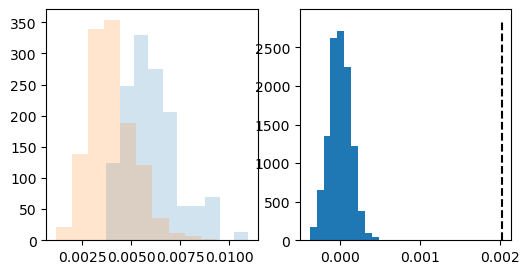

In [1077]:
ntp, nd = 0, 10
x = te_data["te"][:,ntp,nd]
y = te_data["te_surr"][:,ntp,nd]

h = stats.perm_test(x, y, verbose=True)

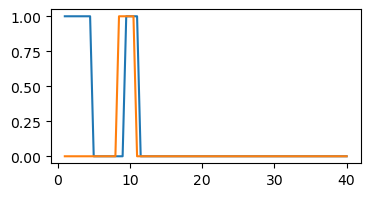

In [1075]:
harr = stats.te_stat_test(te_data, method="conf", alpha=0.05)

plt.figure(figsize=(4, 2))
plt.plot(te_data["tlag"], harr.T)
plt.show()

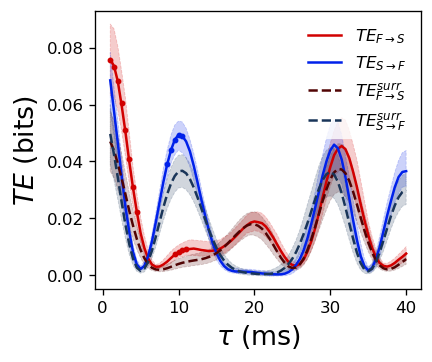

In [1078]:
fig = visu.show_te_summary(te_data, stat_test=True)

## Convert to barcode

In [1090]:
import tebarcode as tb
reload(tb)

<module 'tebarcode' from '/home/jungyoung/Project/hh_neuralnet/information_routing/tebarcode.py'>

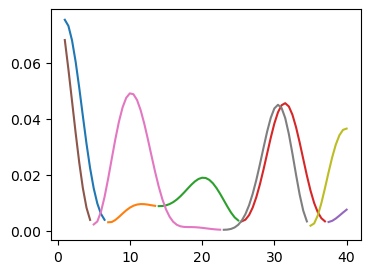

In [1091]:
hinfo = tb.find_te_hill(te_data, verbose=True)

# Generate diagram

In [696]:
import stats
import xarray as xr

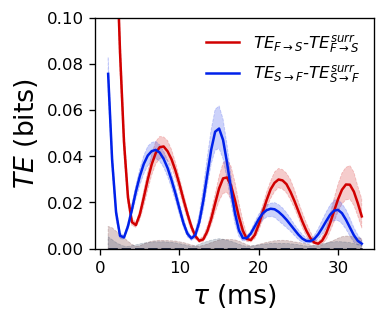

In [1157]:
# cid, wid = 8, 13
cid, wid = 5, 10
# cid, wid = 5, 4
# cid, wid = 4, 2
te_data_2d = utils.load_pickle("./data/te_2d_mua_2/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d, tcut=1e3/visu.fpeaks[cid-1][0])

fig = visu.show_te_summary(te_data, yl=[0, 0.1], figsize=(3, 2.5), subtract_surr=True)

In [1158]:
import tebarcode as tb
reload(tb)

binfo = tb.get_barcode(te_data)

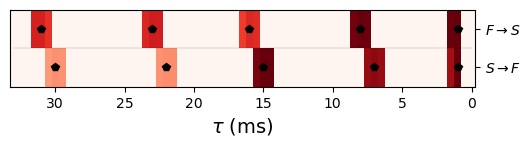

In [1159]:
fig = tb.draw_barcode(binfo)
# fig.gca().set_xlabel(r"$\tau$ (ms)", fontsize=14)
# plt.xlabel(r"$\tau$ (ms)", fontsize=14)
plt.show()

# Compare TE: within same cluster ID

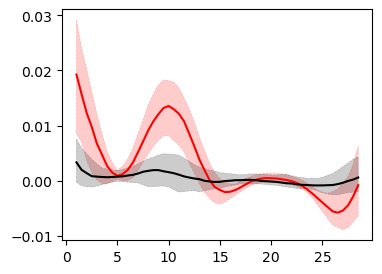

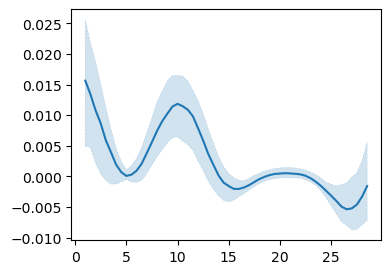

In [1236]:
fdir = "./data/te_2d_mua_2/"
cid, wid = 8, 13

tcut = 1e3/visu.fpeaks[cid-1][0]

te_base = utils.load_pickle(os.path.join(fdir, "te_%d%02d.pkl"%(cid, 0)))
te_base = utils.reduce_te_2d(te_base, tcut=tcut)

te_data = utils.load_pickle(os.path.join(fdir, "te_%d%02d.pkl"%(cid, wid)))
te_data = utils.reduce_te_2d(te_data, tcut=tcut)

ntp = 1
dte_base = te_base["te"][:,ntp,:] - te_base["te_surr"][:,ntp,:].mean(axis=0)
dte_data = te_data["te"][:,ntp,:] - te_data["te_surr"][:,ntp,:].mean(axis=0)

plt.figure(figsize=(4, 3))
t = te_data["tlag"]
visu.draw_with_err(t, dte_data, c='r')
visu.draw_with_err(t, dte_base, c='k')
plt.show()



dte = dte_data - dte_base.mean(axis=0)

plt.figure(figsize=(4, 3))
visu.draw_with_err(t, dte, c='C0')
plt.show()

In [1238]:
from scipy.stats import ttest_ind

In [1246]:
pvals = []
for nd in range(dte_data.shape[-1]):
    res = ttest_ind(dte_data[:,nd], dte_base[:,nd])
    pvals.append(res.pvalue)

In [1230]:
dte_data = te_data["te"] - te_data["te_surr"].mean(axis=0, keepdims=True)
dte_base = te_base["te"] - te_base["te_surr"].mean(axis=0, keepdims=True)

te_boost = dict(te=dte_data, te_surr=dte_base, tlag=te_data["tlag"])
binfo_boost = tb.get_barcode(te_boost)

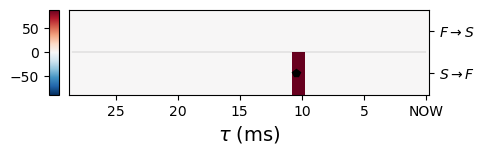

In [1879]:
fig = tb.draw_barcode(binfo_boost, cmap="RdBu_r", figsize=(5, 1.), show_cbar=True)
plt.show()

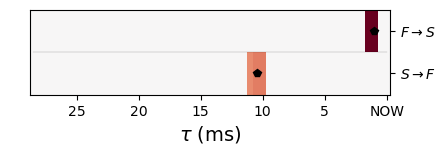

In [1881]:
fig = tb.draw_barcode(binfo, cmap="RdBu_r", figsize=(5, 1.), show_cbar=False)
plt.show()

## Barcode samples

In [1701]:
reload(tb)
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

In [1750]:
cid, wid = 5, 10

tcut = 1e3/visu.fpeaks[cid-1][0]
tcut = max([30, tcut])

te_data_2d = utils.load_pickle("./data/te_2d_mua_2/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d, tcut=tcut)

te_base = utils.load_pickle(os.path.join(fdir, "te_%d%02d.pkl"%(cid, 0)))
te_base = utils.reduce_te_2d(te_base, tcut=tcut)

binfo = tb.get_barcode(te_data)
binfo_boost = tb.get_barcode_boost(te_data, te_base)

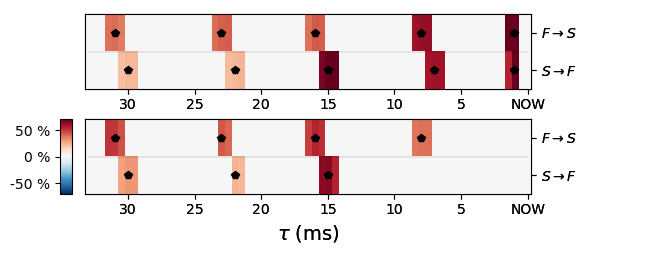

In [1755]:
binfo = tb.get_barcode(te_data)
fig, axs = plt.subplots(2,1,figsize=(8, 2.5))
fig = visu.draw_barcode(binfo, cmap="RdBu_r", vmax=0.05, ax=axs[0])
fig = visu.draw_barcode(binfo_boost, cmap="RdBu_r", vmax=70, ax=axs[1], show_cbar=True)
plt.show()

# Check TE result

## Extract all figures

In [998]:
orders = [0, 2, 10, 6, 14, 4, 5, 7, 15, 8, 13]

def gen_background(dpi=200):
    
    we = 0.01
    wc = 0.025
    wl = 0.01
    num_c = 8

    fig = plt.figure(figsize=(16, 9), dpi=dpi)

    # boundaries
    w = 1 - we*2 - wc
    h = 1 - (we + wc)
    dw = w / len(orders)

    for n in range(len(orders)):
        plt.axes(position=(we+wc+dw*n, h, dw, wc))
        lb = od.get_motif_labels()[orders[n]]
        plt.text(0.5, 0.5, lb, va="center", ha="center", fontsize=12)
        plt.xticks([])
        plt.yticks([])

    # h = 1 - (2*we + wc)
    dh = (h - we) / num_c
    for n in range(num_c):
        # plt.axes(position=(we, 1-we-wc-dh*(n+1), wc, dh))
        plt.axes(position=(we, 1-we-wc-dh*(n+1), wc, dh))
        lb = "%d"%(n+1)
        plt.text(0.5, 0.5, lb, va="center", ha="center", fontsize=16)
        plt.xticks([])
        plt.yticks([])

    # generate axis
    wtot = 1 - 2*we - wc
    htot = 1 - 2*we - wc

    dw = wtot/len(orders)
    dh = htot/num_c
    
    coords = []

    for nc in range(num_c):
        coords.append([])
        h0 = 1 - we - wc - dh*(nc+1)
        for i in range(len(orders)):
            w0 = we + wc + dw*i

            plt.axes(position=(w0, h0, dw, dh))
            plt.xticks([]); plt.yticks([])
            
            coords[-1].append((w0, h0, dw, dh))

            # plt.axes(position=(w0+wl, h0+wl, dw-2*wl, dh-2*wl))
            
    return fig, coords




# Compute TE for total samples

In [1761]:
import os
from tqdm import tqdm

# Parameter setting

cw_pair = [
    [1, 0], [1, 2], [1, 4], [1, 6],
    [2, 0], [2, 2], [2, 8], [2, 10],
    [3, 0], [3, 2], [3, 4], [3, 6],
    [4, 0], [4, 2], [4, 5], [4, 7],
    [5, 0], [5, 4], [5, 10], [5, 14],
    [6, 0], [6, 4], [6, 10], [6, 14],
    [7, 0], [7, 10],
    [8, 0], [8, 2], [8, 13], [8, 15]
]

orders = [0, 2, 10, 6, 14, 4, 5, 7, 15, 8, 13]


tcut = 1e3/np.array(visu.fpeaks)[:, 0]
tcut[tcut < 0] = 30

In [ ]:
data_dir = "./data/te_2d_mua_2/"
fdir = "./figs/te_2d_mua_reduce_2/"

xl_fit = [5, 41]
# xl_show = [0, 41]

yl_set = [[0, 0], [0, 0]]
cid_prv = 1
wid_prv_set = []
for cid, wid in tqdm(cw_pair + [[-1, -1]]):
    # cumulate figs and set ylim
    if cid != cid_prv:
        for wid_prv in wid_prv_set:
            
            xl_show = [0, tcut[cid_prv-1]]
            
            te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid_prv, wid_prv)))
            te_data = utils.reduce_te_2d(te_data_2d, tcut=tcut[cid_prv-1])
            # te_data = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid_prv, wid_prv)))
            
            nc = cid_prv-1
            nw = orders.index(wid_prv)
            
            fig = visu.show_te_summary(te_data, yl=yl_set[0], xlb=None, ylb=None, xl=xl_show)
            visu.draw_freq_indicator(cid_prv, yl=yl_set[0])
            # visu.draw_cfc_indicator(cid_prv, yl=yl_set[0])
            # visu.draw_syn_indicator(yl_set[0])
            
            plt.savefig(os.path.join(fdir, "te_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
            fig = visu.show_te_summary(te_data, yl=yl_set[1], subtract_surr=True, xlb=None, ylb=None, xl=xl_show)
            visu.draw_freq_indicator(cid_prv, yl=yl_set[1])
            # visu.draw_cfc_indicator(cid_prv, yl=yl_set[1])
            # visu.draw_syn_indicator(yl_set[1])
            plt.savefig(os.path.join(fdir, "te_subt_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
        wid_prv_set = []
        cid_prv = cid
        yl_set = [[0, 0], [0, 0]]
        
    if cid == -1: continue

    te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, wid)))
    te_data = utils.reduce_te_2d(te_data_2d, tcut=tcut[cid-1])
    # te_data = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, wid)))
    
    fig = visu.show_te_summary(te_data, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[0][0]: yl_set[0][0] = yl[0]
    if yl[1] > yl_set[0][1]: yl_set[0][1] = yl[1]
    fig.clf()
    
    fig = visu.show_te_summary(te_data, subtract_surr=True, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[1][0]: yl_set[1][0] = yl[0]
    if yl[1] > yl_set[1][1]: yl_set[1][1] = yl[1]
    fig.clf()
    
    plt.close()
    wid_prv_set.append(wid)
    
# fig_bck.show()
# plt.close()

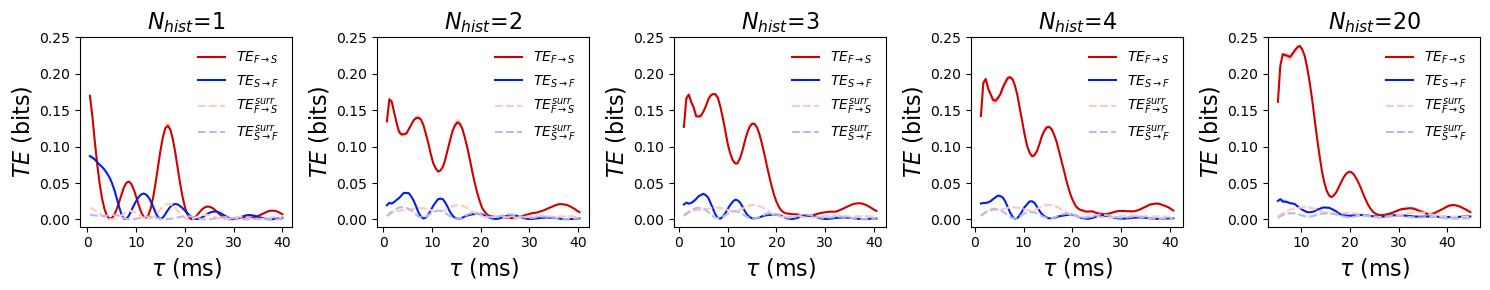

In [106]:
num_pt = [1, 2, 3, 4, 20]
plt.figure(figsize=(15, 3))
for n in range(5):
    
    te_data = utils.load_pickle("./te_multi_hist/te_510(%d).pkl"%(num_pt[n]))
    
    plt.subplot(1,5,n+1)
    fig = visu.show_te_summary(te_data, figsize=None, yl=(-0.01, 0.25), title=r"$N_{hist}$=%d"%(num_pt[n]))

plt.tight_layout()
plt.show()

## combine figures

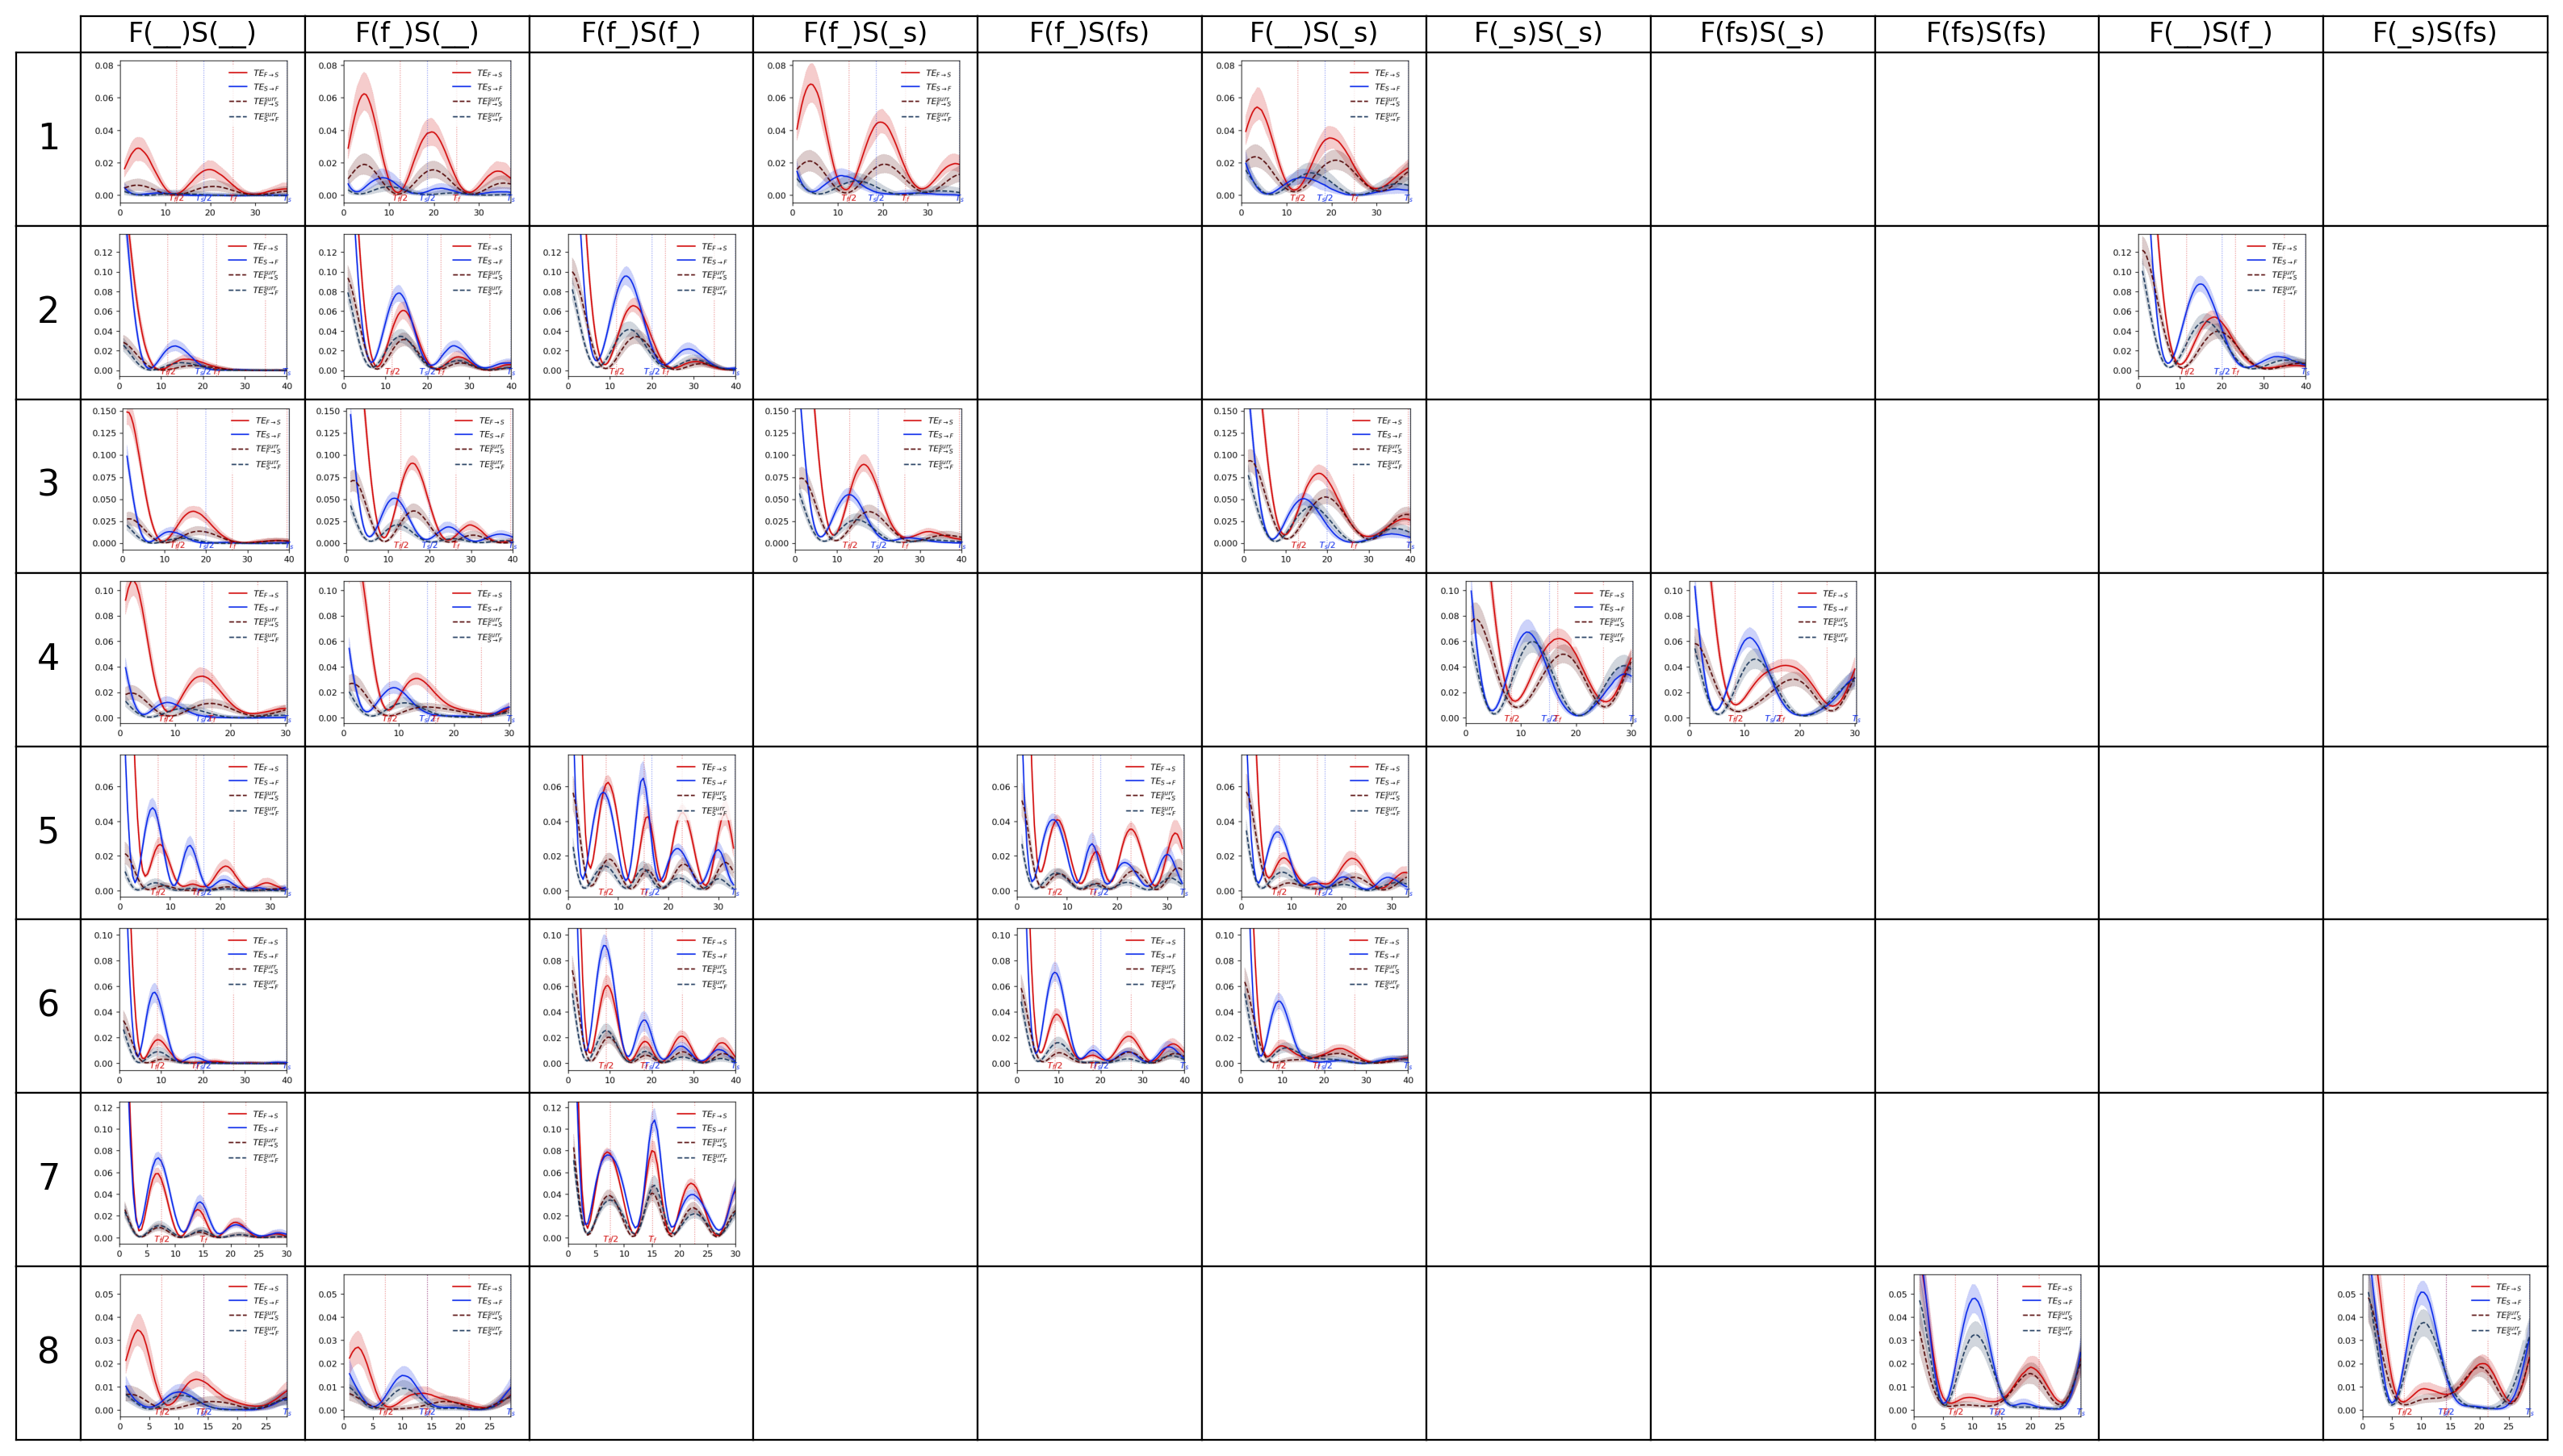

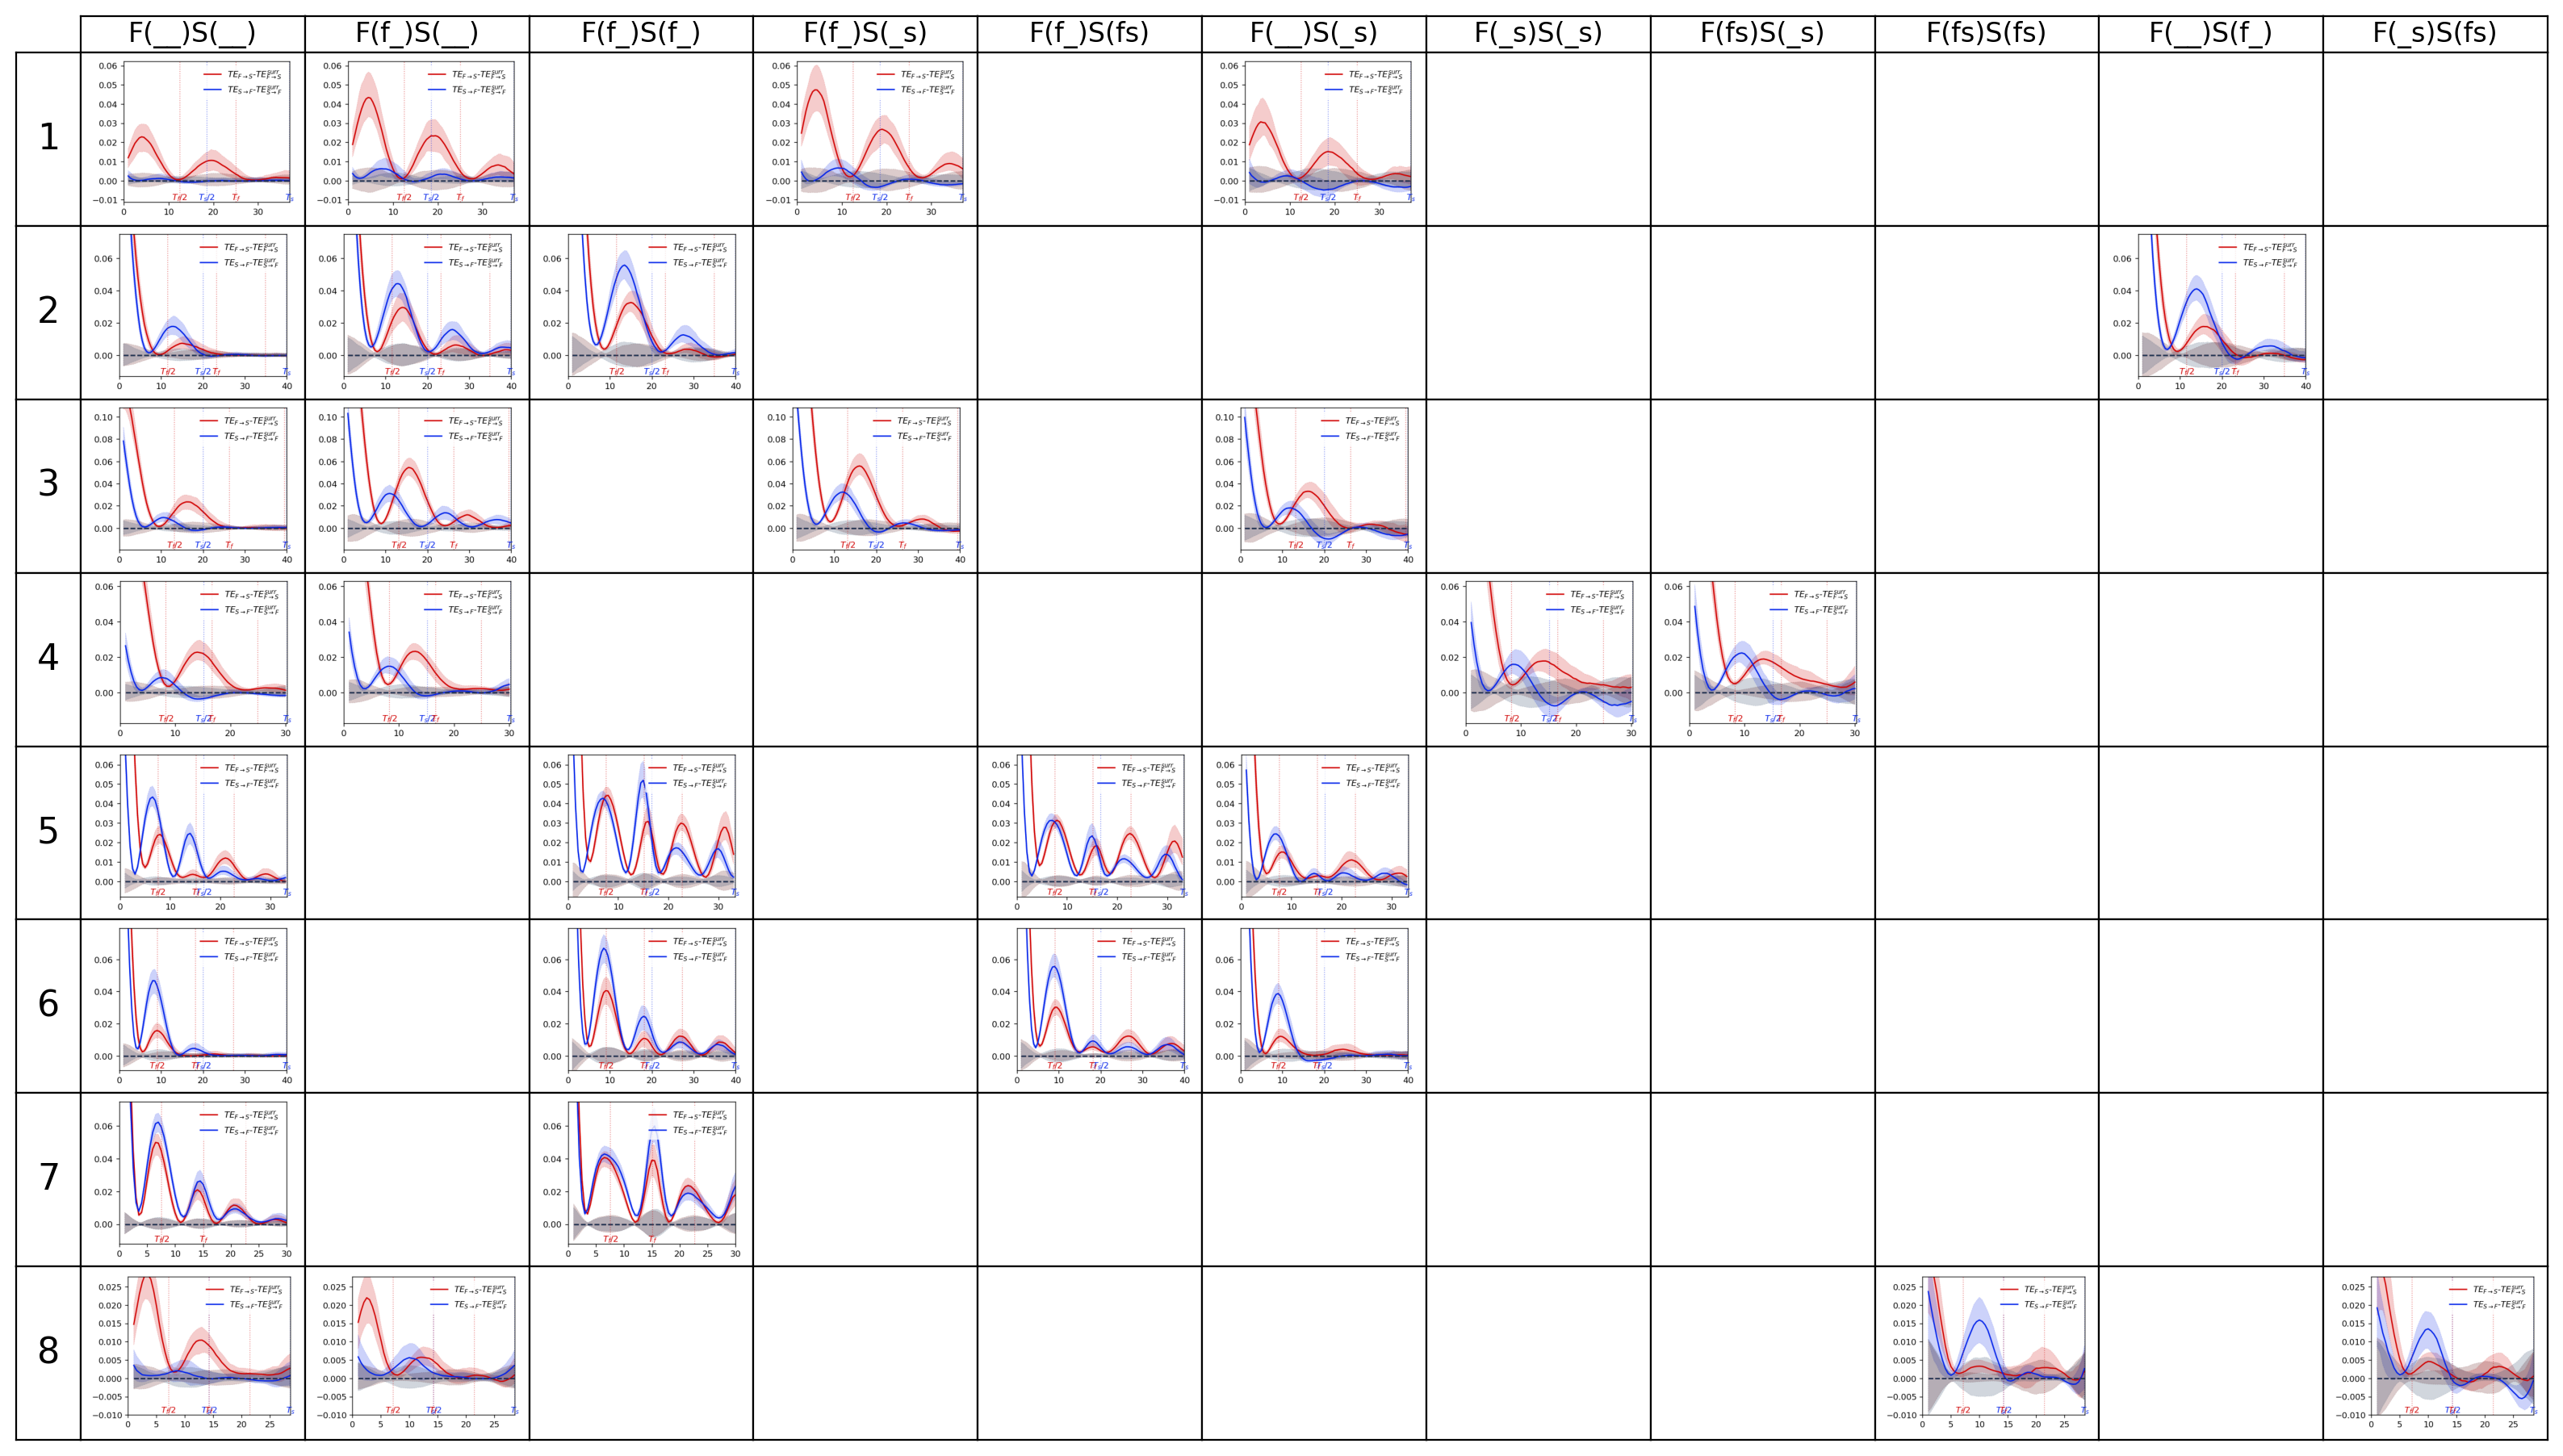

In [933]:
fig_dir = "./figs/te_2d_mua_reduce_2/"

for tag in ("", "_subt"):
    # wl = 0.002

    fig_bck, coords = visu.gen_background()
    for cid, wid in cw_pair:
        nc = cid-1
        nw = orders.index(wid)

        fname = os.path.join(fig_dir, "te%s_%d%02d.png"%(tag, cid, wid))
        im_te = Image.open(fname)

        c = coords[nc][nw]
        fig_bck.add_axes([c[0]+wl, c[1]+wl, c[2]-2*wl, c[3]-2*wl])
        plt.sca(fig_bck.axes[-1])
        plt.imshow(im_te)
        plt.axis("off")

    plt.savefig(os.path.join(fig_dir, "summary%s.png"%(tag)), dpi=400, bbox_inches="tight")

## Export barcodes

In [ ]:
data_dir = "./data/te_2d_mua_2/"
fdir = "./figs/te_barcode/"


for cid, wid in cw_pair:
    if visu.fpeaks[cid-1][0] == -1:
        t0 = 30
    else:
        t0 = 1e3/visu.fpeaks[cid-1][0]

    te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, wid)))
    te_data = utils.reduce_te_2d(te_data_2d, tcut=t0)

    te_base = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, 0)))
    te_base = utils.reduce_te_2d(te_base, tcut=t0)

    binfo = tb.get_barcode(te_data)
    binfo_boost = tb.get_barcode_boost(te_data, te_base)
    
    prefix = os.path.join(fdir, "te%d%02d"%(cid, wid))
    tag_set = ("_barcode.png", "_barcode(k).png", "_barcode(b).png", "_barcode(bk).png")
    vmax_set = (None, None, 75, 75)
    binfo_set = (binfo, binfo, binfo_boost, binfo_boost)
    for n in range(4):
        fig, _ = visu.draw_barcode(binfo_set[n], cmap="RdBu_r", vmax=vmax_set[n],
                                   show_pline=bool(n%2), show_cbar=bool(n//2),
                                   xlb=None, figsize=(5, 1))
        visu.draw_freq_indicator(cid, h=-0.15, lw=1)
        plt.savefig(prefix+tag_set[n], bbox_inches="tight")
        fig.clf()
    plt.close()

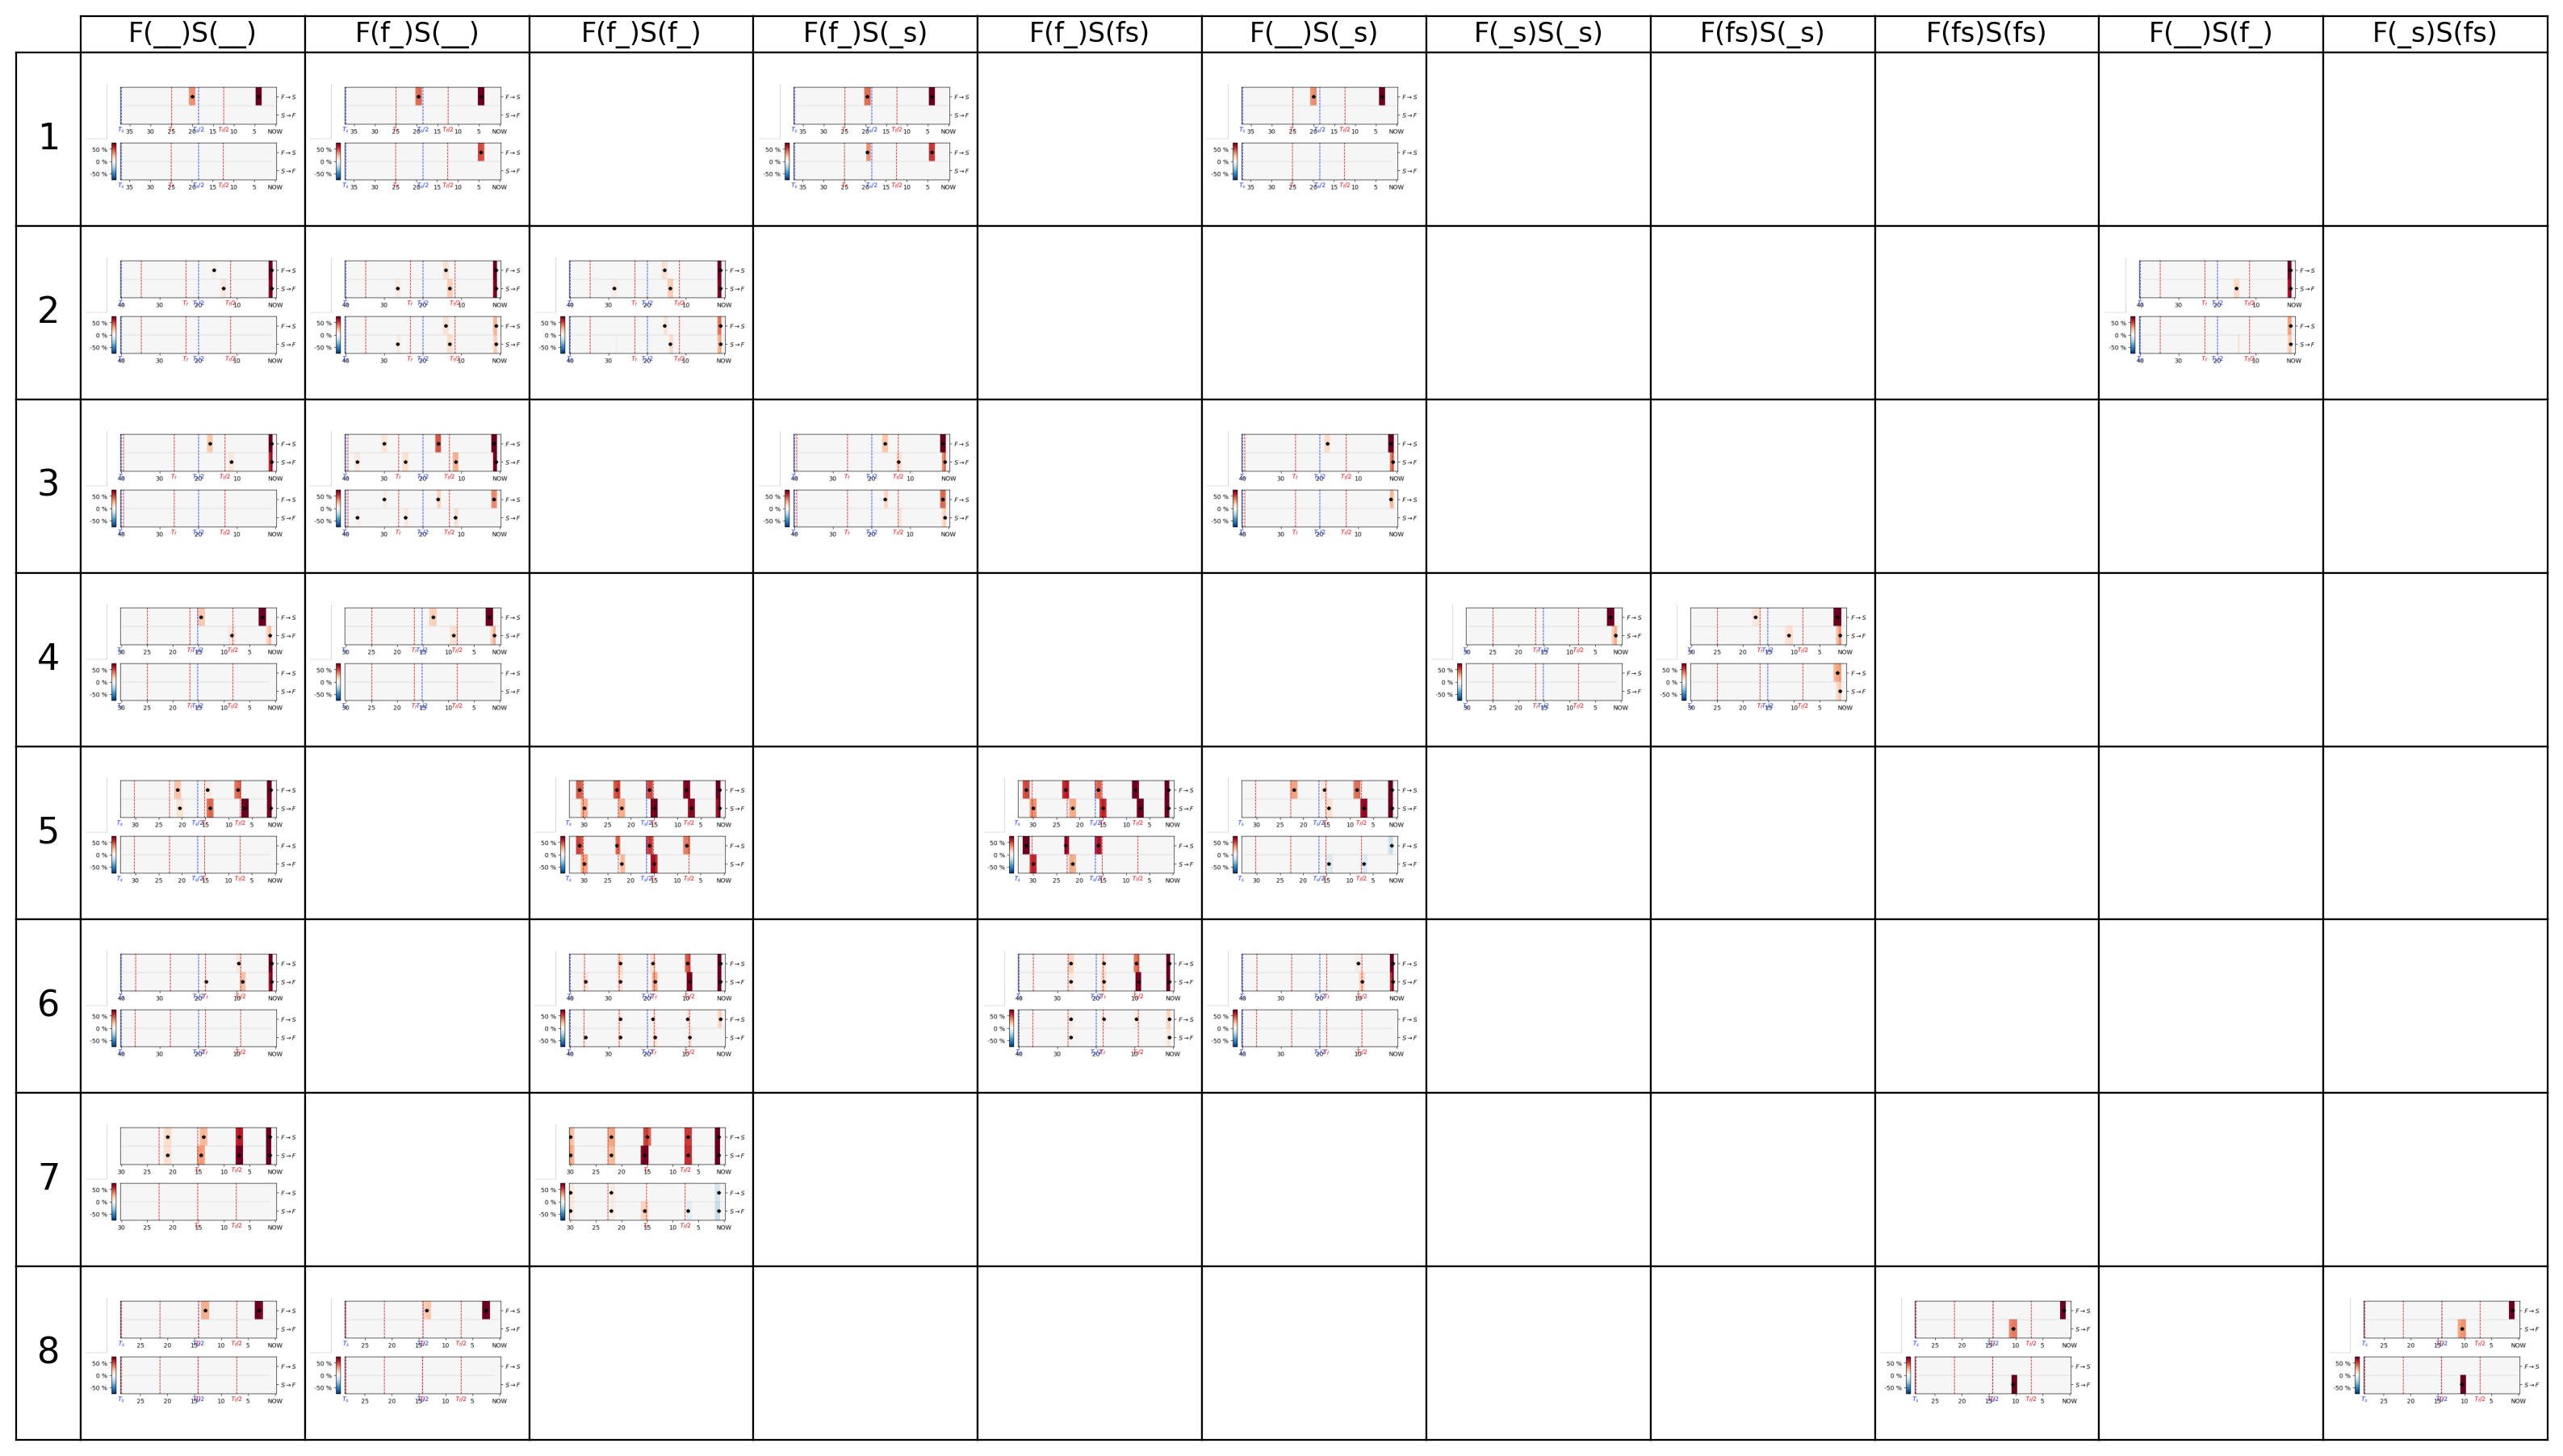

In [1919]:
fig_dir = "./figs/te_barcode//"

fig_bck, coords = visu.gen_background()
for cid, wid in cw_pair:
    nc = cid-1
    nw = orders.index(wid)

    fname = os.path.join(fig_dir, "te%d%02d_barcode.png"%(cid, wid))
    im1 = Image.open(fname)
    
    fname = os.path.join(fig_dir, "te%d%02d_barcode(b).png"%(cid, wid))
    im2 = Image.open(fname)

    sz1 = list(np.shape(im1))
    sz2 = list(np.shape(im2))

    sz = [sz1[0], sz2[1]-sz1[1], sz1[2]]
    im_blank = np.zeros(sz)
    im_cat = np.vstack((np.hstack((im_blank, im1)), im2)).astype(int)

    c = coords[nc][nw]
    fig_bck.add_axes([c[0]+wl, c[1]+wl, c[2]-2*wl, c[3]-2*wl])
    plt.sca(fig_bck.axes[-1])
    plt.imshow(im_cat)
    plt.axis("off")
    
    im1.close()
    im2.close()

plt.savefig(os.path.join(fig_dir, "summary.png"), dpi=400, bbox_inches="tight")

In [1888]:
fname = os.path.join(fig_dir, "te%d%02d_barcode.png"%(cid, wid))
im1 = Image.open(fname)

fname = os.path.join(fig_dir, "te%d%02d_barcode(b).png"%(cid, wid))
im2 = Image.open(fname)

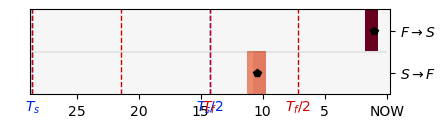

In [1889]:
im1

In [1894]:
np.array(im1).shape

(128, 445, 4)

In [1911]:
sz1 = list(np.shape(im1))
sz2 = list(np.shape(im2))

sz = [sz1[0], sz2[1]-sz1[1], sz1[2]]
im_blank = np.zeros(sz)
im_cat = np.vstack((np.hstack((im_blank, im1)), im2)).astype(int)

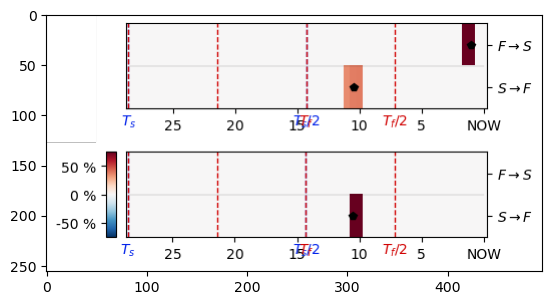

In [1912]:
plt.imshow(im_cat.astype(int))

In [1907]:
im_blank.shape

(128, 50, 4)

In [1903]:
np.shape(im1), np.shape(im2)

((128, 445, 4), (128, 495, 4))

In [1900]:
im_cat = np.vstack((im1, im2))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 445 and the array at index 1 has size 495

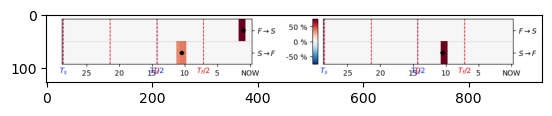

In [1901]:
plt.imshow(im_cat)


In [1898]:
im_cat.shape


(128, 940, 4)

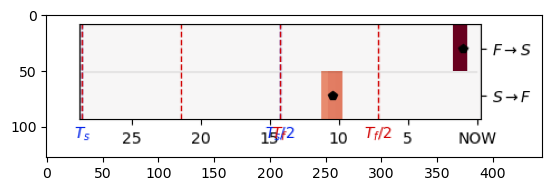

In [1896]:
plt.imshow(np.array(im1, dtype=int))

In [1966]:
te_data_2d = utils.load_pickle("./data/te_2d_mfast/te_202.pkl")
te_data = utils.reduce_te_2d(te_data_2d, tcut=30)

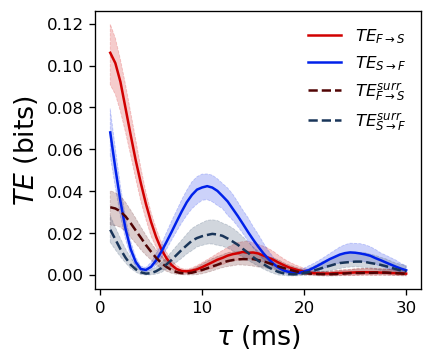

In [1968]:
fig = visu.show_te_summary(te_data)

In [1972]:
te_data_2d = utils.load_pickle("./data/te_2d_mfast/te_208.pkl")
te_data = utils.reduce_te_2d(te_data_2d, tcut=30)

In [ ]:
fig = visu.show_te_summary(te_data)

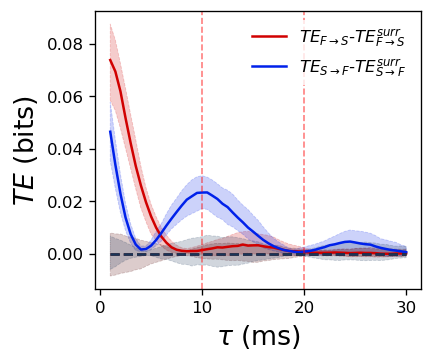

In [1946]:
fig = visu.show_te_summary(te_data, subtract_surr=True)
visu.draw_indicator(1e3/50/2, color='r')
visu.draw_indicator(1e3/50, color='r')

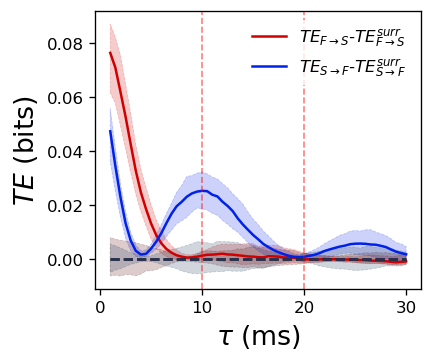

In [1951]:
fig = visu.show_te_summary(te_data, subtract_surr=True)
visu.draw_indicator(1e3/50/2, color='r')
visu.draw_indicator(1e3/50, color='r')

# Spectral characteristics

In [ ]:
import os
from tqdm import tqdm

cw_pair = [
    [1, 0], [1, 2], [1, 4], [1, 6],
    [2, 0], [2, 2], [2, 8], [2, 10],
    [3, 0], [3, 2], [3, 4], [3, 6],
    [4, 0], [4, 2], [4, 5], [4, 7],
    [5, 0], [5, 4], [5, 10], [5, 14],
    [6, 0], [6, 4], [6, 10], [6, 14],
    [7, 0], [7, 10],
    [8, 0], [8, 2], [8, 13], [8, 15]
]

# fig_bck, coords = gen_background()
wl = 0.01

data_dir = "./data/spec"
fdir = "./figs/spec"

xl_fit = [5, 80]
xl_show = [5, 80]

yl_set = [[0, 0], [0, 0]]
cid_prv = 1
wid_prv_set = []
for cid, wid in tqdm(cw_pair + [[-1, -1]]):
    # cumulate figs and set ylim
    if cid != cid_prv:
        for wid_prv in wid_prv_set:
            
            # te_data = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid_prv, wid_prv)))
            
            spec_data = utils.load_pickle(os.path.join(data_dir, "spec_%d%02d.pkl"%(cid_prv, wid_prv)))
            
            nc = cid_prv-1
            nw = orders.index(wid_prv)
            c = coords[nc][nw]
            
            fig = visu.show_spec_summary(spec_data, yl=yl_set[0], xlb=None, ylb=None, xl=xl_show)
            plt.savefig(os.path.join(fdir, "spec_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
        wid_prv_set = []
        cid_prv = cid
        yl_set = [[0, 0], [0, 0]]
        
    if cid == -1: continue
    
    spec_data = utils.load_pickle(os.path.join(data_dir, "spec_%d%02d.pkl"%(cid, wid)))
    
    fig = visu.show_spec_summary(spec_data, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[0][0]: yl_set[0][0] = yl[0]
    if yl[1] > yl_set[0][1]: yl_set[0][1] = yl[1]
    fig.clf()
    
    wid_prv_set.append(wid)
    
fig_bck.show()

plt.clf()

In [ ]:
fig_dir = "./figs/spec/"
tag = ""

wl = 0.002

fig_bck, coords = gen_background()
for cid, wid in cw_pair:
    nc = cid-1
    nw = orders.index(wid)
    
    fname = os.path.join(fig_dir, "spec_%d%02d.png"%(cid, wid))
    im_te = Image.open(fname)
    
    c = coords[nc][nw]
    fig_bck.add_axes([c[0]+wl, c[1]+wl, c[2]-2*wl, c[3]-2*wl])
    plt.sca(fig_bck.axes[-1])
    plt.imshow(im_te)
    plt.axis("off")
    
plt.savefig(os.path.join(fig_dir, "summary.png"), dpi=400, bbox_inches="tight")

In [396]:
fpeaks = [[27, 40],
          [25, 43],
          [25, 38],
          [33, 60],
          [30, 66],
          [25, 55],
          [-1, 66],
          [35, 70]]

In [380]:
cid = 3

wid = 0

spec_data = utils.load_pickle("./data/spec/spec_%d%02d.pkl"%(cid, wid))
te_data_2d = utils.load_pickle("./data/te_2d/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d)

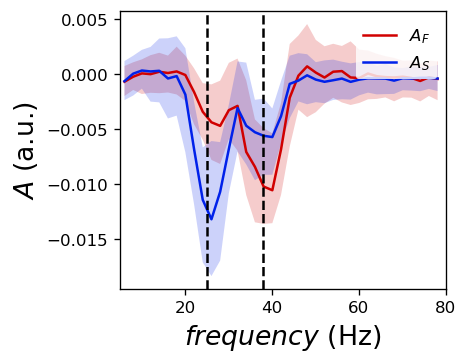

In [381]:
fig = visu.show_spec_summary(spec_data, xl=(5, 80))
yl = fig.gca().get_ylim()

for f0 in fpeaks[cid-1]:
    plt.vlines(f0, yl[0], yl[1], color='k', linestyle='--')

plt.ylim(yl)
plt.show()

In [414]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

In [382]:
te_data_2d = utils.load_pickle("./data/te_2d/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d)

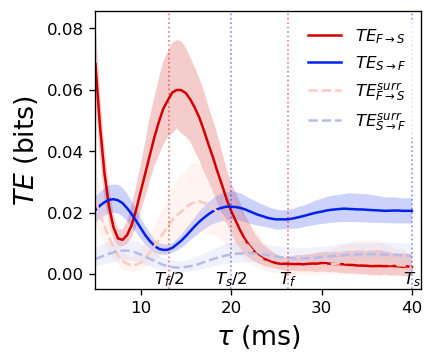

In [415]:
fig = visu.show_te_summary(te_data, xl=(5, 41))
yl = fig.gca().get_ylim()
visu.draw_freq_indicator(cid, yl)

# for i in range(2):
# plt.vlines(1e3/fpeaks[cid-1][0], yl[0], yl[1], color='k', linestyle='--')
# plt.vlines(1e3/fpeaks[cid-1][0]/2, yl[0], yl[1], color='k', linestyle='--')

# plt.vlines(1e3/fpeaks[cid-1][1], yl[0], yl[1], color='k', linestyle='--')
# plt.vlines(1e3/fpeaks[cid-1][1]/2, yl[0], yl[1], color='k', linestyle='--')

# for f0 in fpeaks[cid-1]:
    # plt.vlines(1e3/f0, yl[0], yl[1], color='k', linestyle='--')


In [412]:


def draw_freq_indicator(cid, yl=None):
    if yl is None: yl = [0, 1]
    
    fopt = dict(va="center", ha="center", fontsize=10)
    lopt = dict(linestyle=":", linewidth=1, alpha=0.5)
    tp_labels = [r"$T_s/2$", r"$T_s$", r"$T_f/2$", r"$T_f$"]
    
    for tp in range(2):
        f0 = fpeaks[cid-1][tp]
        plt.vlines(1e3/f0, yl[0], yl[1], color=cs[1-tp], **lopt)
        plt.vlines(1e3/f0/2, yl[0], yl[1], color=cs[1-tp], **lopt)
        
        h = yl[0] + (yl[1]-yl[0])/30
        plt.text(1e3/f0/2, h, tp_labels[2*tp], **fopt)
        plt.text(1e3/f0, h, tp_labels[2*tp+1], **fopt)

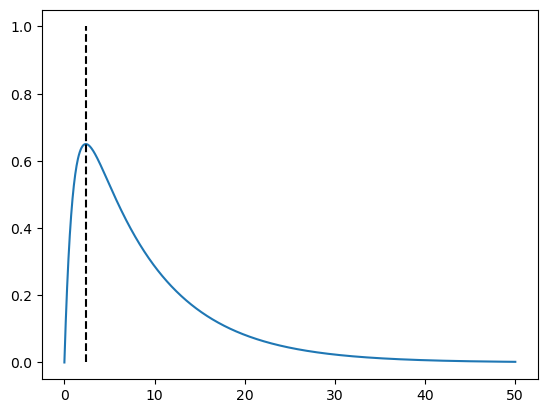

In [448]:
tau2 = 1
tau1 = 8
tp = tau1*tau2 / (tau2 - tau1) * np.log(tau2/tau1)

t = np.linspace(0, 50, 1000)
g = (np.exp(-t/tau1) - np.exp(-t/tau2))

plt.plot(t, g)
plt.vlines(tp, 0, 1, color='k', linestyle="--")
plt.show()

In [465]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

0.5159883447111155
1.0058986952713127
2.3765046190626693


(0.0, 40.0)

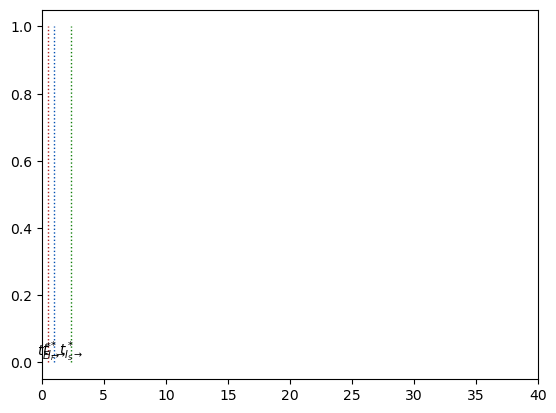

In [467]:
visu.draw_syn_indicator()
plt.xlim([0, 40])

## Degree of boosting

In [575]:
cw_pair = [
    [1, 0], [1, 2], [1, 4], [1, 6],
    [2, 0], [2, 2], [2, 8], [2, 10],
    [3, 0], [3, 2], [3, 4], [3, 6],
    [4, 0], [4, 2], [4, 5], [4, 7],
    [5, 0], [5, 4], [5, 10], [5, 14],
    [6, 0], [6, 4], [6, 10], [6, 14],
    [7, 0], [7, 10],
    [8, 0], [8, 2], [8, 13], [8, 15]
]

In [577]:
te_data["te"].shape

(200, 2, 79)

In [586]:
def compute_boost(x, xbase):
    xs = np.sum(x)
    xbs = np.sum(xbase)
#     return np.sum((x - xbase) / xbase) * 100
    return (xs - xbs) / xbs * 100


for cid, wid in cw_pair:
    if wid == 0: continue
    te_data_2d = utils.load_pickle("./data/te_2d/te_%d%02d.pkl"%(cid, wid))
    te_data = utils.reduce_te_2d(te_data_2d)
    
    te_data_2d_base = utils.load_pickle("./data/te_2d/te_%d00.pkl"%(cid))
    te_data_base = utils.reduce_te_2d(te_data_2d_base)
    
    te = te_data["te"].mean(axis=0)
    te_surr = te_data["te_surr"].mean(axis=0)
    te_base = te_data_base["te"].mean(axis=0)
    
    tag = od.get_motif_labels()[wid]
    print("%s: TE_surr; F->S: %5.2f / S->F: %5.2f, TE_base; F->S: %5.2f / S->F: %5.2f"%(tag, 
                                                                                        compute_boost(te[0], te_surr[0]),
                                                                                        compute_boost(te[1], te_surr[1]),
                                                                                        compute_boost(te[0], te_base[0]),
                                                                                        compute_boost(te[1], te_base[1])))
    
    
    break
    
    
    
    # print("%s: 
    
    

F(f_)S(__): TE_surr; F->S: 136.16 / S->F: 118.37, TE_base; F->S: 131.87 / S->F: 347.73


In [584]:
np.sum((te[0] - te_base[0])/te_base[0])

129.87496576826436

In [ ]:
nid = 1

plt.plot(te[nid])
plt.plot(te_surr[nid])
plt.plot(te_base[nid])

In [585]:
(np.sum(te[0]) - np.sum(te_base[0])) / np.sum(te_base[0])

1.3186587895224473

# Compute TE for total samples